In [1]:
import numpy as np
from scipy.integrate import trapz, cumtrapz
import astropy.constants as const
import astropy.units as u

from IPython.display import display, Math

import h5py

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib import ticker
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.image as mpimg
%matplotlib inline
sns.set_context("talk", font_scale=1.2)
sns.set_style('ticks')
sns.set_palette('colorblind')
figparams = {'font.family': 'DejaVu Sans',
             'font.serif':'Times',
             'text.latex.preamble': r'\usepackage{amsmath}',
             'text.usetex': True,
             'hatch.linewidth' : 3.0}
plt.rcParams.update(figparams)

In [3]:
# Global variables
n_samples = int(2 ** 10)
n_mesh = int(2 ** 5)
n_samples, n_mesh

label_fsize = 50

In [4]:
fidhz = 1 / u.yr
coeffs = 4. * const.G ** (5. / 3.) / (3. * np.pi ** (1. / 3.)
                                          * (const.c ** 2)
                                          * (fidhz ** (4. / 3.)))

In [5]:
log_m_min = 7

# Load data

## AGN-proxy model

In [6]:
with h5py.File('../data/processed/agn_proxy.h5', 'r') as hf:
    log_m_bh_range = hf['log_m_bh_range'][:]
    z_range = hf['z_range'][:]
    q_range = hf['q_range'][:]
    differential_bhb_population = hf['population'][:]
    hc = hf['characteristic_strain'][:]
    local_bhmf = hf['local_bhmf'][:]

### Number density

In [7]:
differential_number_density = trapz(trapz(differential_bhb_population[log_m_bh_range >= log_m_min],
                                          log_m_bh_range[log_m_bh_range >= log_m_min], axis=0), q_range, axis=1)
differential_number_density_q = np.quantile(differential_number_density, q=[.16, .5, .84], axis=-1)

In [8]:
local_number_density = differential_number_density_q[:, 0]

order = 10. ** np.floor(np.log10(local_number_density[1]))
display(Math(r'\Phi_{{\rm{{BHB}}, 0}} = ({0:.1f}^{{+{1:.1f}}}_{{-{2:.1f}}}) \times 10^{{{3}}}\;\rm{{Mpc}}^{{-3}}'
             .format(local_number_density[1] / order,
                     (local_number_density[2] - local_number_density[1]) / order,
                     (local_number_density[1] - local_number_density[0]) / order,
                     np.log10(order))))

local_number_density = local_number_density[1]

<IPython.core.display.Math object>

## AGN-proxy model with Kormendy & Ho

In [9]:
with h5py.File('../data/processed/agn_proxy_kh.h5', 'r') as hf:
    log_m_bh_range_kh = hf['log_m_bh_range'][:]
    differential_bhb_population_kh = hf['population'][:]
    hc_kh = hf['characteristic_strain'][:]
    local_bhmf_kh = hf['local_bhmf'][:]

### Number density

In [10]:
differential_number_density_kh = trapz(trapz(differential_bhb_population_kh[log_m_bh_range_kh >= log_m_min],
                                             log_m_bh_range[log_m_bh_range_kh >= log_m_min], axis=0), q_range, axis=1)
differential_number_density_kh_q = np.quantile(differential_number_density_kh, q=[.16, .5, .84], axis=-1)

In [11]:
local_number_density_kh = differential_number_density_kh_q[:, 0]

order = 10. ** np.floor(np.log10(local_number_density_kh[1]))
display(Math(r'\Phi_{{\rm{{BHB}}, 0}} = ({0:.1f}^{{+{1:.1f}}}_{{-{2:.1f}}}) \times 10^{{{3}}}\;\rm{{Mpc}}^{{-3}}'
             .format(local_number_density_kh[1] / order,
                     (local_number_density_kh[2] - local_number_density_kh[1]) / order,
                     (local_number_density_kh[1] - local_number_density_kh[0]) / order,
                     np.log10(order))))

local_number_density_kh = local_number_density_kh[1]

<IPython.core.display.Math object>

## S1

In [12]:
# the mass and the mass ratio ranges for all models are shared, so we will only load them once
with h5py.File('../data/processed/S1.h5', 'r') as hf:
    z_range_borch = hf['z_range'][:]
    S1_bhb_population = hf['population'][:]
    S1_hc = hf['characteristic_strain'][:]
    S1_local_bhmf = hf['local_bhmf'][:]

### Number density

In [13]:
S1_number_density = trapz(trapz(S1_bhb_population[log_m_bh_range >= log_m_min],
                                          log_m_bh_range[log_m_bh_range >= log_m_min], axis=0), q_range, axis=1)
S1_number_density_q = np.quantile(S1_number_density, q=[.16, .5, .84], axis=-1)

In [14]:
S1_local_number_density = S1_number_density_q[:, 0]

order = 10. ** np.floor(np.log10(S1_local_number_density[1]))
display(Math(r'\Phi_{{\rm{{BHB}}, 0, \rm{{S1}}}} = ({0:.1f}^{{+{1:.1f}}}_{{-{2:.1f}}}) \times 10^{{{3}}}\;\rm{{Mpc}}^{{-3}}'
             .format(S1_local_number_density[1] / order,
                     (S1_local_number_density[2] - S1_local_number_density[1]) / order,
                     (S1_local_number_density[1] - S1_local_number_density[0]) / order,
                     np.log10(order))))

S1_local_number_density = S1_local_number_density[1]

<IPython.core.display.Math object>

## S2

In [15]:
with h5py.File('../data/processed/S2.h5', 'r') as hf:
    z_range_drory = hf['z_range'][:]
    S2_bhb_population = hf['population'][:]
    S2_hc = hf['characteristic_strain'][:]
    S2_number_density = hf['number_density'][:]
    S2_local_bhmf = hf['local_bhmf'][:]

### Number density

In [16]:
S2_number_density = trapz(trapz(S2_bhb_population[log_m_bh_range >= log_m_min],
                                          log_m_bh_range[log_m_bh_range >= log_m_min], axis=0), q_range, axis=1)
S2_number_density_q = np.quantile(S2_number_density, q=[.16, .5, .84], axis=-1)

In [17]:
S2_local_number_density = S2_number_density_q[:, 0]

order = 10. ** np.floor(np.log10(S2_local_number_density[1]))
display(Math(r'\Phi_{{\rm{{BHB}}, 0, \rm{{S1}}}} = ({0:.1f}^{{+{1:.1f}}}_{{-{2:.1f}}}) \times 10^{{{3}}}\;\rm{{Mpc}}^{{-3}}'
             .format(S2_local_number_density[1] / order,
                     (S2_local_number_density[2] - S2_local_number_density[1]) / order,
                     (S2_local_number_density[1] - S2_local_number_density[0]) / order,
                     np.log10(order))))

S2_local_number_density = S2_local_number_density[1]

<IPython.core.display.Math object>

## S3

In [18]:
with h5py.File('../data/processed/S3.h5', 'r') as hf:
    z_range_ilbert = hf['z_range'][:]
    S3_bhb_population = hf['population'][:]
    S3_hc = hf['characteristic_strain'][:]
    S3_number_density = hf['number_density'][:]
    S3_local_bhmf = hf['local_bhmf'][:]

### Number density

In [19]:
S3_number_density = trapz(trapz(S3_bhb_population[log_m_bh_range >= log_m_min],
                                          log_m_bh_range[log_m_bh_range >= log_m_min], axis=0), q_range, axis=1)
S3_number_density_q = np.quantile(S3_number_density, q=[.16, .5, .84], axis=-1)

In [20]:
S3_local_number_density = S3_number_density_q[:, 0]

order = 10. ** np.floor(np.log10(S3_local_number_density[1]))
display(Math(r'\Phi_{{\rm{{BHB}}, 0, \rm{{S1}}}} = ({0:.1f}^{{+{1:.1f}}}_{{-{2:.1f}}}) \times 10^{{{3}}}\;\rm{{Mpc}}^{{-3}}'
             .format(S3_local_number_density[1] / order,
                     (S3_local_number_density[2] - S3_local_number_density[1]) / order,
                     (S3_local_number_density[1] - S3_local_number_density[0]) / order,
                     np.log10(order))))

S3_local_number_density = S3_local_number_density[1]

<IPython.core.display.Math object>

# Analysis

## Agn-proxy model

In [21]:
mm, zz, qq = np.meshgrid(log_m_bh_range, z_range, q_range, indexing='ij')

In [22]:
hc_integrand = (coeffs * differential_bhb_population * ((10 ** (mm * (5 / 3)))
                                              * (qq / ((1 + qq) ** (1 / 3)))
                                              / ((1 + zz) ** (1. / 3.)))[..., np.newaxis]
                * (u.Msun ** (5 / 3)) / (u.Mpc ** 3))

In [23]:
hc_bounds = np.sqrt(cumtrapz(cumtrapz(cumtrapz(hc_integrand[::-1, :, ::-1, :].to(''),
                                               log_m_bh_range[::-1], axis=0, initial=0),
                                      z_range, axis=1, initial=0),
                             q_range[::-1], axis=2, initial=0))

hc_q_bounds = np.quantile(hc_bounds, q=[.16, .5, .84], axis=-1)

In [24]:
z_sat = z_range[hc_q_bounds[1, -1, :, -1] >= 0.95 * hc_q_bounds[1, -1, -1, -1]][0]
log_m_sat = log_m_bh_range[::-1][(hc_q_bounds[1, :, z_range == z_sat, -1] >= 0.95 * hc_q_bounds[1, -1, z_range == z_sat, -1])[0]][0]

hc_sat = hc_q_bounds[1, log_m_bh_range[::-1] == log_m_sat, z_range == z_sat, -1]

log_m_bh_range_zoom = log_m_bh_range[::-1][1:]
log_m_bh_range_zoom = log_m_bh_range_zoom[log_m_bh_range_zoom >= log_m_sat]

z_range_zoom = z_range[(z_range >= 1) & (z_range <= z_sat)]

### NANOGrav

In [25]:
NANOGrav_n_artificial_range = np.sqrt(np.logspace(-1., 2., num=n_mesh))
NANOGrav_mult_factor = (1.9e-15 / (.95 * hc_sat[0])) ** 2
NANOGrav_mult_factor_sqrt = np.sqrt(NANOGrav_mult_factor)
NANOGrav_n_artificial_range = np.sort(np.append(NANOGrav_n_artificial_range, NANOGrav_mult_factor_sqrt))
NANOGrav_mult_factor

6.172567445820858

In [26]:
NANOGrav_hc_cube = hc_bounds[:, (z_range >= 1) & (z_range <= z_sat), -1, :]
NANOGrav_hc_cube = NANOGrav_hc_cube[1:, :]
NANOGrav_hc_cube = NANOGrav_hc_cube[log_m_bh_range[::-1][1:] >= log_m_sat, ...]
NANOGrav_hc_cube = np.quantile(NANOGrav_hc_cube, q=.5, axis=-1)
NANOGrav_hc_cube = NANOGrav_hc_cube[..., np.newaxis] * NANOGrav_n_artificial_range[np.newaxis, np.newaxis, :]

NANOGrav_mm_cube = mm[:, (z_range >= 1) & (z_range <= z_sat), -1]
NANOGrav_mm_cube = NANOGrav_mm_cube[::-1, ...]
NANOGrav_mm_cube = NANOGrav_mm_cube[1:, ...]
NANOGrav_mm_cube = NANOGrav_mm_cube[log_m_bh_range[::-1][1:] >= log_m_sat, ...]
NANOGrav_mm_cube = np.repeat(NANOGrav_mm_cube[..., np.newaxis], len(NANOGrav_n_artificial_range), axis=-1)

NANOGrav_zz_cube = zz[:, (z_range >= 1) & (z_range <= z_sat), -1]
NANOGrav_zz_cube = NANOGrav_zz_cube[1:, :]
NANOGrav_zz_cube = NANOGrav_zz_cube[log_m_bh_range[::-1][1:] >= log_m_sat, ...]
NANOGrav_zz_cube = np.repeat(NANOGrav_zz_cube[..., np.newaxis], len(NANOGrav_n_artificial_range), axis=-1)

NANOGrav_nn_cube = local_number_density * (np.broadcast_to(NANOGrav_n_artificial_range[np.newaxis, np.newaxis, ...],
                                                           NANOGrav_hc_cube.shape) ** 2)

In [27]:
with open('../data/processed/mathematica_coords_NANOGrav.npy', 'wb') as f:
    mathematica_coords = np.array([NANOGrav_mm_cube.ravel(),
                                   NANOGrav_zz_cube.ravel(),
                                   np.log10(NANOGrav_nn_cube.ravel()),
                                   NANOGrav_hc_cube.ravel()]).T
    mathematica_coords.tofile(f)

### IPTA

In [28]:
IPTA_n_artificial_range = np.sqrt(np.logspace(-1., 2., num=n_mesh))
IPTA_mult_factor = (2.35e-15 / (.95 * hc_sat[0])) ** 2
IPTA_mult_factor_sqrt = np.sqrt(IPTA_mult_factor)
IPTA_n_artificial_range = np.sort(np.append(IPTA_n_artificial_range, IPTA_mult_factor_sqrt))
IPTA_mult_factor

9.442660310123458

In [29]:
IPTA_hc_cube = hc_bounds[:, (z_range >= 1) & (z_range <= z_sat), -1, :]
IPTA_hc_cube = IPTA_hc_cube[1:, :]
IPTA_hc_cube = IPTA_hc_cube[log_m_bh_range[::-1][1:] >= log_m_sat, ...]
IPTA_hc_cube = np.quantile(IPTA_hc_cube, q=.5, axis=-1)
IPTA_hc_cube = IPTA_hc_cube[..., np.newaxis] * IPTA_n_artificial_range[np.newaxis, np.newaxis, :]

IPTA_mm_cube = mm[:, (z_range >= 1) & (z_range <= z_sat), -1]
IPTA_mm_cube = IPTA_mm_cube[::-1, ...]
IPTA_mm_cube = IPTA_mm_cube[1:, ...]
IPTA_mm_cube = IPTA_mm_cube[log_m_bh_range[::-1][1:] >= log_m_sat, ...]
IPTA_mm_cube = np.repeat(IPTA_mm_cube[..., np.newaxis], len(IPTA_n_artificial_range), axis=-1)

IPTA_zz_cube = zz[:, (z_range >= 1) & (z_range <= z_sat), -1]
IPTA_zz_cube = IPTA_zz_cube[1:, :]
IPTA_zz_cube = IPTA_zz_cube[log_m_bh_range[::-1][1:] >= log_m_sat, ...]
IPTA_zz_cube = np.repeat(IPTA_zz_cube[..., np.newaxis], len(IPTA_n_artificial_range), axis=-1)

IPTA_nn_cube = local_number_density * (np.broadcast_to(IPTA_n_artificial_range[np.newaxis, np.newaxis, ...],
                                                       IPTA_hc_cube.shape) ** 2)

In [30]:
with open('../data/processed/mathematica_coords_IPTA.npy', 'wb') as f:
    mathematica_coords = np.array([IPTA_mm_cube.ravel(),
                                   IPTA_zz_cube.ravel(),
                                   np.log10(IPTA_nn_cube.ravel()),
                                   IPTA_hc_cube.ravel()]).T
    mathematica_coords.tofile(f)

## S1

In [31]:
mm, zz, qq = np.meshgrid(log_m_bh_range, z_range_borch, q_range, indexing='ij')

In [32]:
S1_hc_integrand = (coeffs * S1_bhb_population * ((10 ** (mm * (5 / 3)))
                                              * (qq / ((1 + qq) ** (1 / 3)))
                                              / ((1 + zz) ** (1. / 3.)))[..., np.newaxis]
                * (u.Msun ** (5 / 3)) / (u.Mpc ** 3))

In [33]:
S1_hc_bounds = np.sqrt(cumtrapz(cumtrapz(cumtrapz(S1_hc_integrand[::-1, :, ::-1, :].to(''),
                                                  log_m_bh_range[::-1], axis=0, initial=0),
                                      z_range_borch, axis=1, initial=0),
                             q_range[::-1], axis=2, initial=0))

S1_hc_q_bounds = np.quantile(S1_hc_bounds, q=[.16, .5, .84], axis=-1)

## S2

In [34]:
mm, zz, qq = np.meshgrid(log_m_bh_range, z_range_drory, q_range, indexing='ij')

In [35]:
S2_hc_integrand = (coeffs * S2_bhb_population * ((10 ** (mm * (5 / 3)))
                                              * (qq / ((1 + qq) ** (1 / 3)))
                                              / ((1 + zz) ** (1. / 3.)))[..., np.newaxis]
                * (u.Msun ** (5 / 3)) / (u.Mpc ** 3))

In [36]:
S2_hc_bounds = np.sqrt(cumtrapz(cumtrapz(cumtrapz(S2_hc_integrand[::-1, :, ::-1, :].to(''),
                                                  log_m_bh_range[::-1], axis=0, initial=0),
                                      z_range_drory, axis=1, initial=0),
                             q_range[::-1], axis=2, initial=0))

S2_hc_q_bounds = np.quantile(S2_hc_bounds, q=[.16, .5, .84], axis=-1)

## S3

In [37]:
mm, zz, qq = np.meshgrid(log_m_bh_range, z_range_ilbert, q_range, indexing='ij')

In [38]:
S3_hc_integrand = (coeffs * S3_bhb_population * ((10 ** (mm * (5 / 3)))
                                              * (qq / ((1 + qq) ** (1 / 3)))
                                              / ((1 + zz) ** (1. / 3.)))[..., np.newaxis]
                * (u.Msun ** (5 / 3)) / (u.Mpc ** 3))

In [39]:
S3_hc_bounds = np.sqrt(cumtrapz(cumtrapz(cumtrapz(S3_hc_integrand[::-1, :, ::-1, :].to(''),
                                                  log_m_bh_range[::-1], axis=0, initial=0),
                                      z_range_ilbert, axis=1, initial=0),
                             q_range[::-1], axis=2, initial=0))

S3_hc_q_bounds = np.quantile(S3_hc_bounds, q=[.16, .5, .84], axis=-1)

# Plots

## AGN-proxy model

### NANOGrav

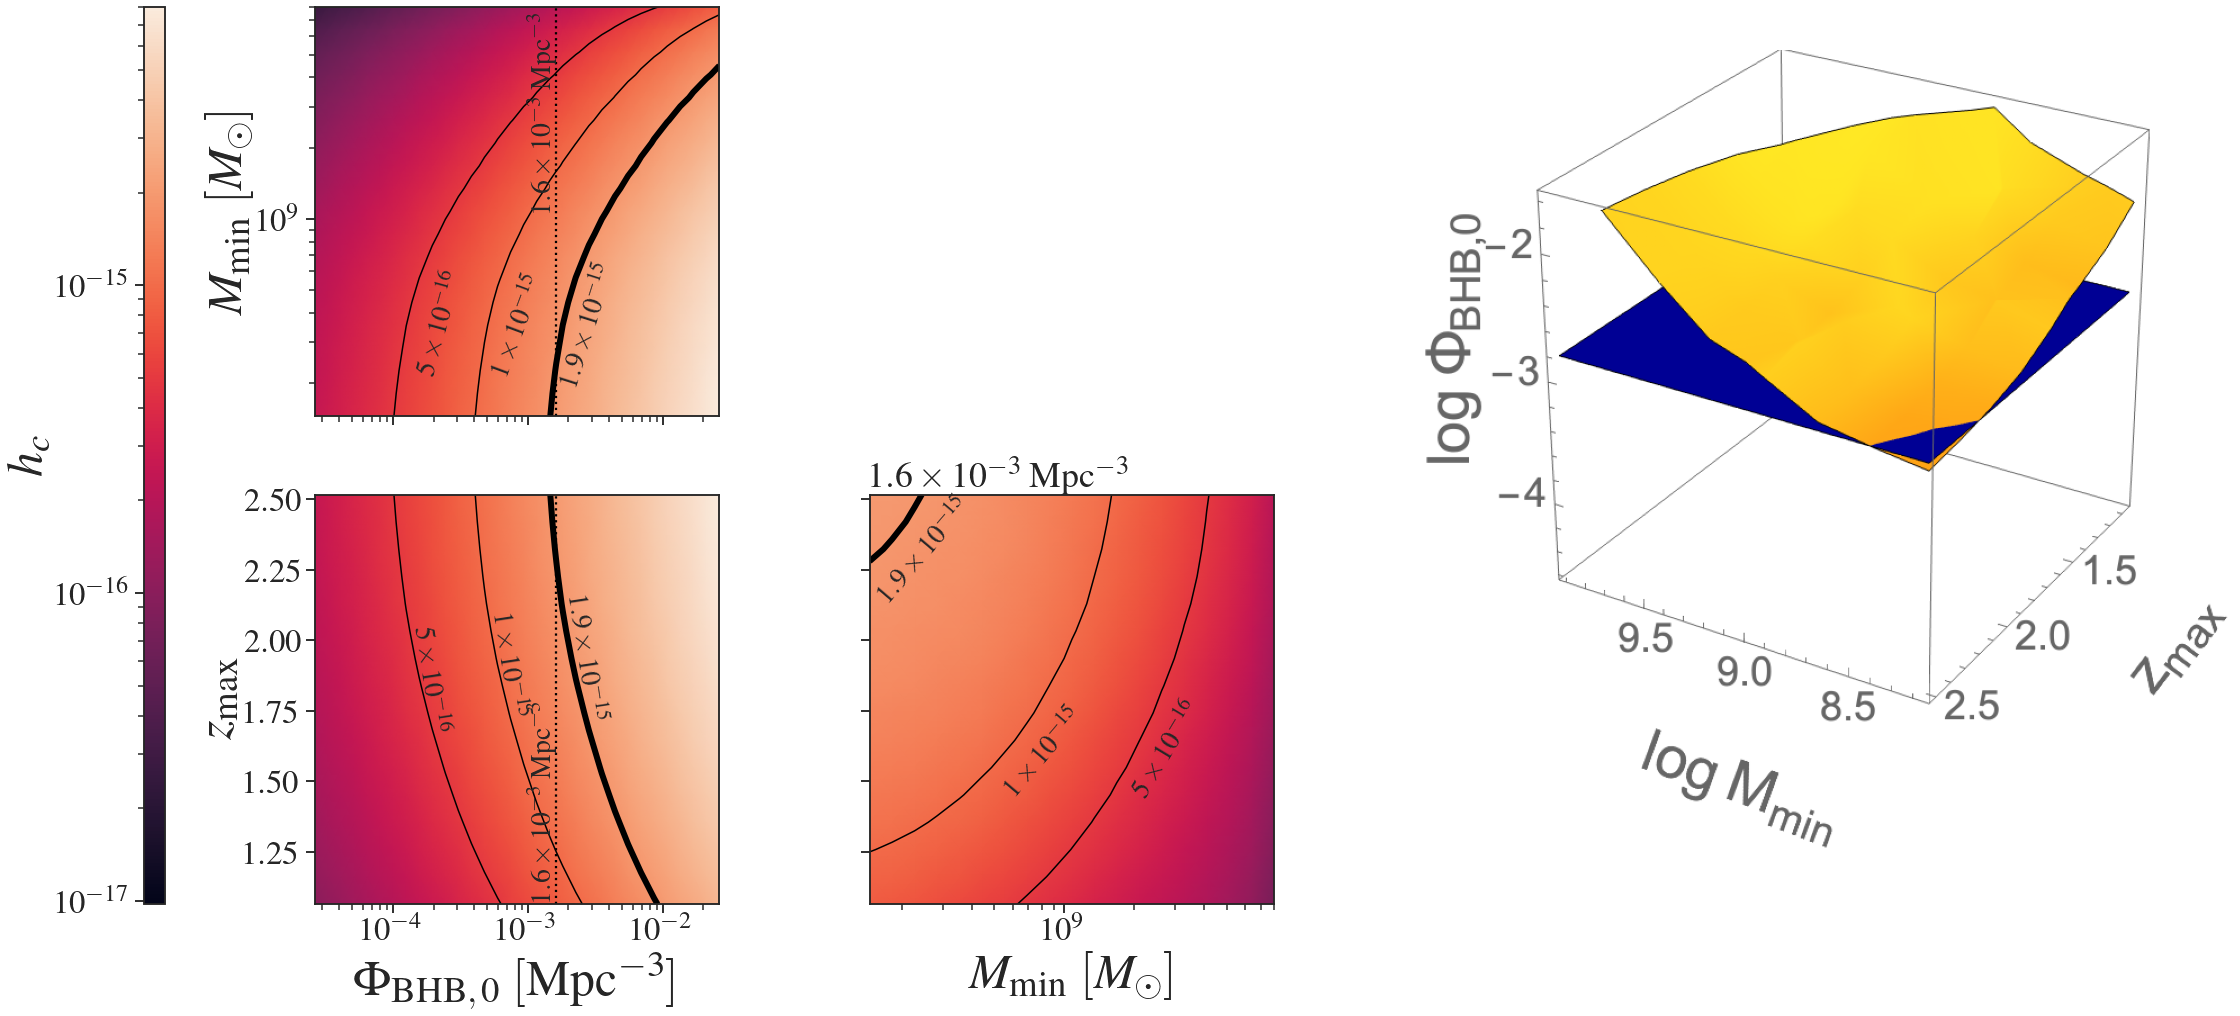

In [40]:
# corner plots
# %matplotlib inline
fmt = {}
strs = [r'$5 \times 10^{{-16}}$', r'$1 \times 10^{{-15}}$', r'$1.9 \times 10^{{-15}}$']
levels = [5e-16, 1e-15, 1.9e-15]
linewidths = [1.5, 1.5, 6]
labels = dict(zip(levels, strs))
cfont_size = 32
inline_spacing=1
inline=False
n_art_idx = 21
text_fs = 28

NANOGrav_plot_3d = mpimg.imread('../reports/figures/NANOGrav_3D.png')

sns.set_context("talk", font_scale=2)

widths = [.05, 1, 1, 2]
heights = [1, 1]

order = 10. ** np.floor(np.log10(local_number_density * NANOGrav_mult_factor))
art_dens = r'${0:.1f} \times 10^{{{1:.0f}}} \; \rm{{Mpc}}^{{-3}}$'.format(local_number_density * NANOGrav_mult_factor / order, np.log10(order))

fig_width = 30
fig_height = fig_width * np.sum(heights) / (np.sum(widths) + .1)

fig = plt.figure(figsize=(32, 15))
gs = fig.add_gridspec(nrows=2, ncols=4, width_ratios=widths, height_ratios=heights)

cnorm = colors.LogNorm(vmin=np.amin(NANOGrav_hc_cube),
                       vmax=np.amax(NANOGrav_hc_cube))

# next the slices from 3D parameter space
mm_nn_ax = fig.add_subplot(gs[0, 1])
pcm = mm_nn_ax.pcolormesh(np.squeeze(NANOGrav_nn_cube[:, z_range_zoom == z_sat, :]),
                          10 ** np.squeeze(NANOGrav_mm_cube[:, z_range_zoom == z_sat, :]),
                          np.squeeze(NANOGrav_hc_cube[:, z_range_zoom == z_sat, :]), norm=cnorm,
                          shading='gouraud')
cs = mm_nn_ax.contour(np.squeeze(NANOGrav_nn_cube[:, z_range_zoom == z_sat, :]),
                       np.squeeze(10 ** NANOGrav_mm_cube[:, z_range_zoom == z_sat, :]),
                       np.squeeze(NANOGrav_hc_cube[:, z_range_zoom == z_sat, :]), levels=levels,
                       locator=ticker.LogLocator(), colors='black',
                       linewidths=linewidths)

# custom contours
# for i, (cl, lbl) in enumerate(zip(cs.collections, strs)):
p = cs.collections[0].get_paths()[0]
v = p.vertices
x = v[:, 0]
y = v[:, 1]

mid = int(np.trunc(len(x) / 2)) - 10
rot = np.degrees(np.arctan2([np.log10(y[mid - 4]) - np.log10(y[mid - 10])], [np.log10(x[mid - 4]) - np.log10(x[mid - 10])]))[0]
mm_nn_ax.text(x[mid + 2], y[mid - 5], strs[0], rotation=rot,
              verticalalignment='baseline', horizontalalignment='center', rotation_mode='anchor', fontsize=text_fs)

p = cs.collections[1].get_paths()[0]
v = p.vertices
x = v[:, 0]
y = v[:, 1]

mid = int(np.trunc(len(x) / 2)) - 9
rot = np.degrees(np.arctan2([np.log10(y[mid - 4]) - np.log10(y[mid - 6])], [np.log10(x[mid - 4]) - np.log10(x[mid - 6])]))[0]
mm_nn_ax.text(x[mid + 2], y[mid - 5], strs[1], rotation=rot,
              verticalalignment='baseline', horizontalalignment='center', rotation_mode='anchor', fontsize=text_fs)

p = cs.collections[2].get_paths()[0]
v = p.vertices
x = v[:, 0]
y = v[:, 1]

mid = int(np.trunc(len(x) / 2)) - 5
rot = np.degrees(np.arctan2([np.log10(y[mid - 2]) - np.log10(y[mid - 10])], [np.log10(x[mid - 2]) - np.log10(x[mid - 10])]))[0]
mm_nn_ax.text(x[mid + 2], y[mid - 5], strs[2], rotation=rot,
              verticalalignment='baseline', horizontalalignment='center', rotation_mode='anchor', fontsize=text_fs)

mm_nn_ax.axvline(local_number_density * NANOGrav_mult_factor, color='k', linestyle=':')
mm_nn_ax.text(local_number_density * NANOGrav_mult_factor, 10 ** (np.max(log_m_bh_range_zoom) - .01), art_dens, rotation='vertical',
              horizontalalignment='right', verticalalignment='bottom', rotation_mode='anchor', fontsize=text_fs)
mm_nn_ax.set_ylabel(r'$M_{\rm{min}}\ [M_{\odot}]$', fontsize=label_fsize)
mm_nn_ax.set_yscale('log')
mm_nn_ax.set_xscale('log')
plt.setp(mm_nn_ax.get_xticklabels(), visible=False)

zz_nn_ax = fig.add_subplot(gs[1, 1], sharex=mm_nn_ax)
pcm = zz_nn_ax.pcolormesh(np.squeeze(NANOGrav_nn_cube[log_m_bh_range_zoom == log_m_sat, :, :]),
                          np.squeeze(NANOGrav_zz_cube[log_m_bh_range_zoom == log_m_sat, :, :]),
                          np.squeeze(NANOGrav_hc_cube[log_m_bh_range_zoom == log_m_sat, :, :]), norm=cnorm,
                          shading='gouraud')
cs = zz_nn_ax.contour(np.squeeze(NANOGrav_nn_cube[log_m_bh_range_zoom == log_m_sat, :, :]),
                       np.squeeze(NANOGrav_zz_cube[log_m_bh_range_zoom == log_m_sat, :, :]),
                       np.squeeze(NANOGrav_hc_cube[log_m_bh_range_zoom == log_m_sat, :, :]), levels=levels,
                       locator=ticker.LogLocator(), colors='black',
                       linewidths=linewidths)

# custom contours
for cl, lbl in zip(cs.collections, strs):
    p = cl.get_paths()[0]
    v = p.vertices
    x = v[:, 0]
    y = v[:, 1]
    
    mid = int(np.trunc(len(x) / 2))
    
    rot = np.degrees(np.arctan2([y[-1] - y[0]], [np.log10(x[-1]) - np.log10(x[0])]))[0] - 20
    
    zz_nn_ax.text(x[mid + 2], y[mid - 4], lbl, rotation=rot,
                  verticalalignment='top', horizontalalignment='center', rotation_mode='anchor', fontsize=text_fs)
    
zz_nn_ax.axvline(local_number_density * NANOGrav_mult_factor, color='k', linestyle=':')
zz_nn_ax.text(local_number_density * NANOGrav_mult_factor, np.min(z_range_zoom) + .01, art_dens, rotation='vertical',
              horizontalalignment='left', verticalalignment='bottom', rotation_mode='anchor', fontsize=text_fs)
zz_nn_ax.set_xlabel(r'$\Phi_{\rm{BHB},\,0}\ [\rm{Mpc}^{-3}]$', fontsize=label_fsize)
zz_nn_ax.set_xscale('log')
zz_nn_ax.set_ylabel(r'$z_{\rm{max}}$', fontsize=label_fsize)

zz_mm_ax = fig.add_subplot(gs[1, 2], sharey=zz_nn_ax)
pcm = zz_mm_ax.pcolormesh(10 ** np.squeeze(NANOGrav_mm_cube[:, :, NANOGrav_n_artificial_range == NANOGrav_mult_factor_sqrt]),
                          np.squeeze(NANOGrav_zz_cube[:, :, NANOGrav_n_artificial_range == NANOGrav_mult_factor_sqrt]),
                          np.squeeze(NANOGrav_hc_cube[:, :, NANOGrav_n_artificial_range == NANOGrav_mult_factor_sqrt]),
                          norm=cnorm, shading='gouraud')
cs = zz_mm_ax.contour(10 ** np.squeeze(NANOGrav_mm_cube[:, :, NANOGrav_n_artificial_range == NANOGrav_mult_factor_sqrt]),
                       np.squeeze(NANOGrav_zz_cube[:, :, NANOGrav_n_artificial_range == NANOGrav_mult_factor_sqrt]),
                       np.squeeze(NANOGrav_hc_cube[:, :, NANOGrav_n_artificial_range == NANOGrav_mult_factor_sqrt]), levels=levels,
                       locator=ticker.LogLocator(), colors='black',
                       linewidths=linewidths)

# custom contours
for cl, lbl in zip(cs.collections, strs):
    p = cl.get_paths()[0]
    v = p.vertices
    x = v[:, 0]
    y = v[:, 1]
    
    mid = int(np.trunc(len(x) / 2))
    
    rot = np.degrees(np.arctan2([y[mid + 1] - y[mid - 1]], [np.log10(x[mid + 1]) - np.log10(x[mid - 1])]))[0]
    
    zz_mm_ax.text(x[mid + 1], y[mid - 1], lbl, rotation=rot,
                  verticalalignment='top', horizontalalignment='center', rotation_mode='anchor', fontsize=text_fs)

zz_mm_ax.set_xlabel(r'$M_{\rm{min}}\ [M_{\odot}]$', fontsize=label_fsize)
zz_mm_ax.set_xscale('log')
zz_mm_ax.set_title(art_dens, loc='left')
plt.setp(zz_mm_ax.get_yticklabels(), visible=False)

# add a colorbar
cb_ax = fig.add_subplot(gs[:, 0])
cb = plt.colorbar(pcm, cax=cb_ax)
cb.set_label(r'$h_{c}$', fontsize=label_fsize)

cb_ax.yaxis.set_ticks_position('left')
cb_ax.yaxis.set_label_position('left')

# add Mathematica plot
plot_3d_ax = fig.add_subplot(gs[:, 3])
plot_3d_ax.imshow(NANOGrav_plot_3d)
plot_3d_ax.axis('off')

plt.tight_layout()
plt.savefig('../reports/figures/corner_NANOGrav.pdf')
plt.savefig('../reports/figures/corner_NANOGrav.png')
plt.show()

### IPTA

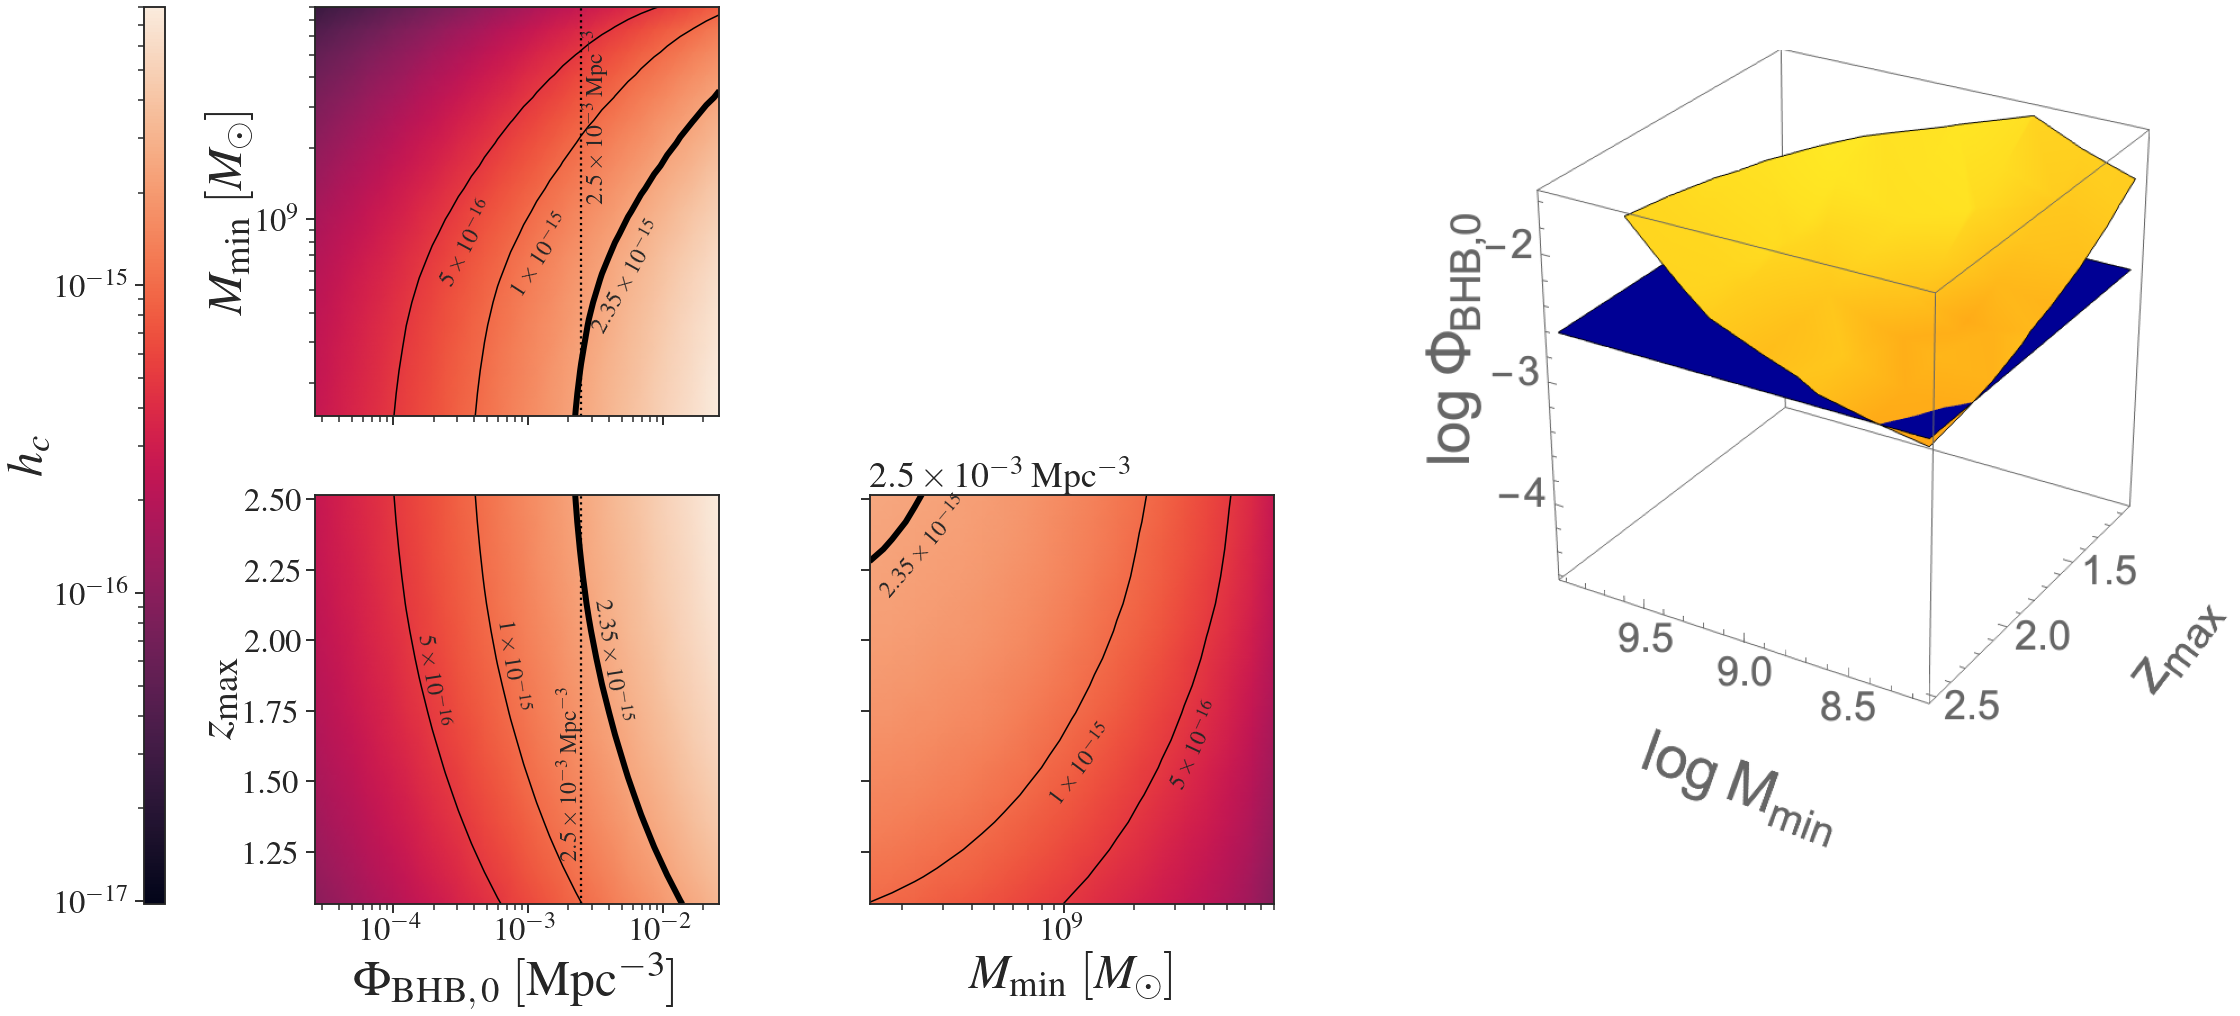

In [41]:
# corner plots
# %matplotlib inline
fmt = {}
strs = [r'$5 \times 10^{{-16}}$', r'$1 \times 10^{{-15}}$', r'$2.35 \times 10^{{-15}}$']
levels = [5e-16, 1e-15, 2.35e-15]
linewidths = [1.5, 1.5, 6]
labels = dict(zip(levels, strs))
cfont_size = 32
inline_spacing=1
inline=False
n_art_idx = 21
text_fs = 24

IPTA_plot_3d = mpimg.imread('../reports/figures/IPTA_3D.png')

sns.set_context("talk", font_scale=2)

widths = [.05, 1, 1, 2]
heights = [1, 1]

order = 10. ** np.floor(np.log10(local_number_density * IPTA_mult_factor))
art_dens = r'${0:.1f} \times 10^{{{1:.0f}}} \; \rm{{Mpc}}^{{-3}}$'.format(local_number_density * IPTA_mult_factor / order, np.log10(order))

fig_width = 30
fig_height = fig_width * np.sum(heights) / (np.sum(widths) + .1)

fig = plt.figure(figsize=(32, 15))
gs = fig.add_gridspec(nrows=2, ncols=4, width_ratios=widths, height_ratios=heights)

cnorm = colors.LogNorm(vmin=np.amin(IPTA_hc_cube),
                       vmax=np.amax(IPTA_hc_cube))

# next the slices from 3D parameter space
mm_nn_ax = fig.add_subplot(gs[0, 1])
pcm = mm_nn_ax.pcolormesh(np.squeeze(IPTA_nn_cube[:, z_range_zoom == z_sat, :]),
                          10 ** np.squeeze(IPTA_mm_cube[:, z_range_zoom == z_sat, :]),
                          np.squeeze(IPTA_hc_cube[:, z_range_zoom == z_sat, :]), norm=cnorm,
                          shading='gouraud')
cs = mm_nn_ax.contour(np.squeeze(IPTA_nn_cube[:, z_range_zoom == z_sat, :]),
                       np.squeeze(10 ** IPTA_mm_cube[:, z_range_zoom == z_sat, :]),
                       np.squeeze(IPTA_hc_cube[:, z_range_zoom == z_sat, :]), levels=levels,
                       locator=ticker.LogLocator(), colors='black',
                       linewidths=linewidths)

# custom contours
# for i, (cl, lbl) in enumerate(zip(cs.collections, strs)):
p = cs.collections[0].get_paths()[0]
v = p.vertices
x = v[:, 0]
y = v[:, 1]

mid = int(np.trunc(len(x) / 2)) - 5
rot = np.degrees(np.arctan2([np.log10(y[mid]) - np.log10(y[mid - 15])], [np.log10(x[mid]) - np.log10(x[mid - 15])]))[0]
mm_nn_ax.text(x[mid + 1], y[mid - 5], strs[0], rotation=rot,
              verticalalignment='baseline', horizontalalignment='center', rotation_mode='anchor', fontsize=text_fs)

p = cs.collections[1].get_paths()[0]
v = p.vertices
x = v[:, 0]
y = v[:, 1]

mid = int(np.trunc(len(x) / 2)) - 5
rot = np.degrees(np.arctan2([np.log10(y[mid]) - np.log10(y[mid - 10])], [np.log10(x[mid]) - np.log10(x[mid - 10])]))[0]
mm_nn_ax.text(x[mid + 1], y[mid - 5], strs[1], rotation=rot,
              verticalalignment='baseline', horizontalalignment='center', rotation_mode='anchor', fontsize=text_fs)

p = cs.collections[2].get_paths()[0]
v = p.vertices
x = v[:, 0]
y = v[:, 1]

mid = int(np.trunc(len(x) / 2))
rot = np.degrees(np.arctan2([np.log10(y[mid]) - np.log10(y[mid - 10])], [np.log10(x[mid]) - np.log10(x[mid - 10])]))[0]
mm_nn_ax.text(x[mid + 1], y[mid - 5], strs[2], rotation=rot,
              verticalalignment='baseline', horizontalalignment='center', rotation_mode='anchor', fontsize=text_fs)

mm_nn_ax.axvline(local_number_density * IPTA_mult_factor, color='k', linestyle=':')
mm_nn_ax.text(local_number_density * IPTA_mult_factor, 10 ** (np.max(log_m_bh_range_zoom) - .1), art_dens, rotation='vertical',
              horizontalalignment='right', verticalalignment='top', rotation_mode='anchor', fontsize=text_fs)

mm_nn_ax.set_ylabel(r'$M_{\rm{min}}\ [M_{\odot}]$', fontsize=label_fsize)
mm_nn_ax.set_yscale('log')
mm_nn_ax.set_xscale('log')
plt.setp(mm_nn_ax.get_xticklabels(), visible=False)

zz_nn_ax = fig.add_subplot(gs[1, 1], sharex=mm_nn_ax)
pcm = zz_nn_ax.pcolormesh(np.squeeze(IPTA_nn_cube[log_m_bh_range_zoom == log_m_sat, :, :]),
                          np.squeeze(IPTA_zz_cube[log_m_bh_range_zoom == log_m_sat, :, :]),
                          np.squeeze(IPTA_hc_cube[log_m_bh_range_zoom == log_m_sat, :, :]), norm=cnorm,
                          shading='gouraud')
cs = zz_nn_ax.contour(np.squeeze(IPTA_nn_cube[log_m_bh_range_zoom == log_m_sat, :, :]),
                       np.squeeze(IPTA_zz_cube[log_m_bh_range_zoom == log_m_sat, :, :]),
                       np.squeeze(IPTA_hc_cube[log_m_bh_range_zoom == log_m_sat, :, :]), levels=levels,
                       locator=ticker.LogLocator(), colors='black',
                       linewidths=linewidths)

# custom contours
for cl, lbl in zip(cs.collections, strs):
    p = cl.get_paths()[0]
    v = p.vertices
    x = v[:, 0]
    y = v[:, 1]
    
    mid = int(np.trunc(len(x) / 2))
    
    rot = np.degrees(np.arctan2([y[-1] - y[0]], [np.log10(x[-1]) - np.log10(x[0])]))[0] - 20
    
    zz_nn_ax.text(x[mid + 2], y[mid - 4], lbl, rotation=rot,
                  verticalalignment='top', horizontalalignment='center', rotation_mode='anchor', fontsize=text_fs)

zz_nn_ax.axvline(local_number_density * IPTA_mult_factor, color='k', linestyle=':')
zz_nn_ax.text(local_number_density * IPTA_mult_factor, np.min(z_range_zoom) + .15, art_dens, rotation='vertical',
              horizontalalignment='left', verticalalignment='bottom', rotation_mode='anchor', fontsize=text_fs)
zz_nn_ax.set_xlabel(r'$\Phi_{\rm{BHB},\,0}\ [\rm{Mpc}^{-3}]$', fontsize=label_fsize)
zz_nn_ax.set_xscale('log')
zz_nn_ax.set_ylabel(r'$z_{\rm{max}}$', fontsize=label_fsize)

zz_mm_ax = fig.add_subplot(gs[1, 2], sharey=zz_nn_ax)
pcm = zz_mm_ax.pcolormesh(10 ** np.squeeze(IPTA_mm_cube[:, :, IPTA_n_artificial_range == IPTA_mult_factor_sqrt]),
                          np.squeeze(IPTA_zz_cube[:, :, IPTA_n_artificial_range == IPTA_mult_factor_sqrt]),
                          np.squeeze(IPTA_hc_cube[:, :, IPTA_n_artificial_range == IPTA_mult_factor_sqrt]),
                          norm=cnorm, shading='gouraud')
cs = zz_mm_ax.contour(10 ** np.squeeze(IPTA_mm_cube[:, :, IPTA_n_artificial_range == IPTA_mult_factor_sqrt]),
                       np.squeeze(IPTA_zz_cube[:, :, IPTA_n_artificial_range == IPTA_mult_factor_sqrt]),
                       np.squeeze(IPTA_hc_cube[:, :, IPTA_n_artificial_range == IPTA_mult_factor_sqrt]), levels=levels,
                       locator=ticker.LogLocator(), colors='black',
                       linewidths=linewidths)

# custom contours
for cl, lbl in zip(cs.collections, strs):
    p = cl.get_paths()[0]
    v = p.vertices
    x = v[:, 0]
    y = v[:, 1]
    
    mid = int(np.trunc(len(x) / 2))
    
    rot = np.degrees(np.arctan2([y[mid + 1] - y[mid - 1]], [np.log10(x[mid + 1]) - np.log10(x[mid - 1])]))[0]
    
    zz_mm_ax.text(x[mid + 1], y[mid - 1], lbl, rotation=rot,
                  verticalalignment='top', horizontalalignment='center', rotation_mode='anchor', fontsize=text_fs)

zz_mm_ax.set_xlabel(r'$M_{\rm{min}}\ [M_{\odot}]$', fontsize=label_fsize)
zz_mm_ax.set_xscale('log')
zz_mm_ax.set_title(art_dens, loc='left')
plt.setp(zz_mm_ax.get_yticklabels(), visible=False)

# add a colorbar
cb_ax = fig.add_subplot(gs[:, 0])
cb = plt.colorbar(pcm, cax=cb_ax)
cb.set_label(r'$h_{c}$', fontsize=label_fsize)

cb_ax.yaxis.set_ticks_position('left')
cb_ax.yaxis.set_label_position('left')

# add Mathematica plot
plot_3d_ax = fig.add_subplot(gs[:, 3])
plot_3d_ax.imshow(IPTA_plot_3d)
plot_3d_ax.axis('off')

plt.tight_layout()
plt.savefig('../reports/figures/corner_IPTA.pdf')
plt.savefig('../reports/figures/corner_IPTA.png')
plt.show()